In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import enum

In [4]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [5]:
df = pd.read_csv("sap_storing_data_hu_project.csv")

/Users/ceyhun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We hebben de categoriale features en numerieke features gesplits in 2 dataframes. dit doen we zodat het makkelijker is om vergelijkingen te maken

In [6]:
numeriek = df.select_dtypes(include=np.number)
categoriaal_df = df.select_dtypes(include=["object"])

We hebben uiteindelijk alle hoge en lage outliers van het numerieke dataframe uitgehaalt

## Outliers eruit

We hebben ook de NA's uitgehaald van het numerieke dataframe en het categoriale dataframe.

## NA'S eruit

In [7]:
numeriek = numeriek.dropna()
categoriaal_df = categoriaal_df.dropna()

## Interesante Categoriale Features

## Interesante Numerieke Features

In [8]:
prioriteit_feature = numeriek["stm_prioriteit"]
functieherstel = numeriek["stm_fh_duur"]
oorzaakcode_feature = numeriek["stm_oorz_code"]

### Feature variable - prioriteit

We zagen dat een prioriteit van 1 altijd de functie herstel heeft van 0 wat we uit kunnen gaan het het makkelijk op te lossen was.

Text(0, 0.5, 'prioriteit')

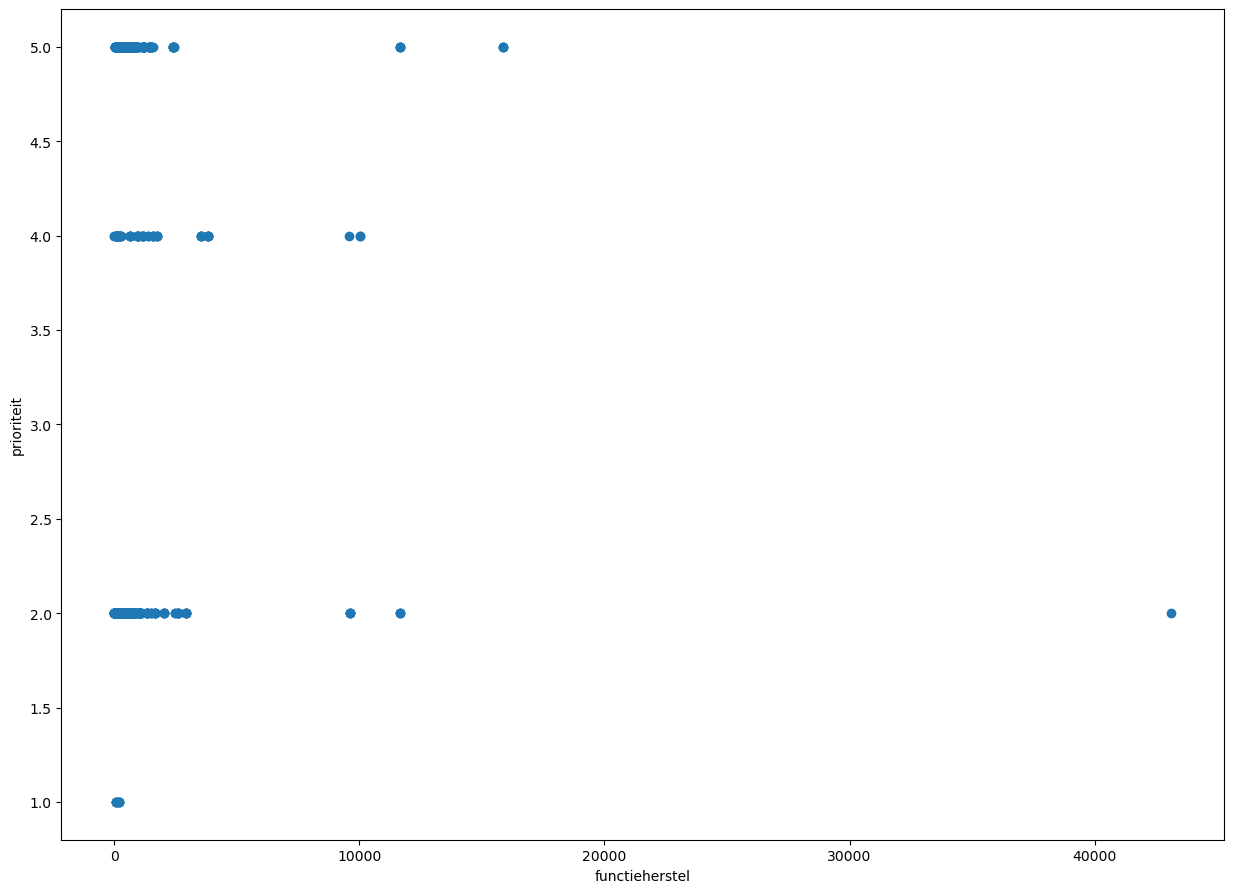

In [9]:
plt.figure(figsize=(15,11), dpi=100)
plt.scatter(functieherstel, prioriteit_feature, label="Scatter Plot")
plt.xlabel("functieherstel")
plt.ylabel("prioriteit")

We hebben ook snel naar de frequency gekeken van elk prioriteit welke het grootse modus had van alle prioriteiten.

<AxesSubplot:>

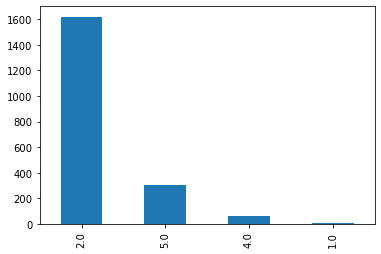

In [10]:
prioriteit_feature.value_counts().plot(kind='bar')

### Conclusie -  prioriteit

we kunnen een conclusie trekken dat de prioriteit feature wel wat over de functiehersteltijd zegt. maar dat er wel weinig gevallen waren waar de functieherstel best lang was. we zien wel uit de onderzoek dat een prioriteit van 1 altijd een functiehersteltijd heeft van 0 wat wilt zeggen dat elke probleem met die prioriteit altijd zowat is opgelost. we kunnnen aannemen dat dat best groot effect heeft op de functie herstel dan de andere prioriteiten. 

### Feature variable - oorzaakcode

We konden vooral niet zien of er een trend was binnen het data waarom somige oorzaak codes een langere functie herstel hadden dan andere. Daarom gaan we proberen of we bepaalde oorzaak codes kunnen groeperen zodat we meer algemener kunnen praten over een bepaald storing groep en daar een uitspraak kunnen maken over de functie herstel van die groep.


Text(0, 0.5, 'oorzaak_code')

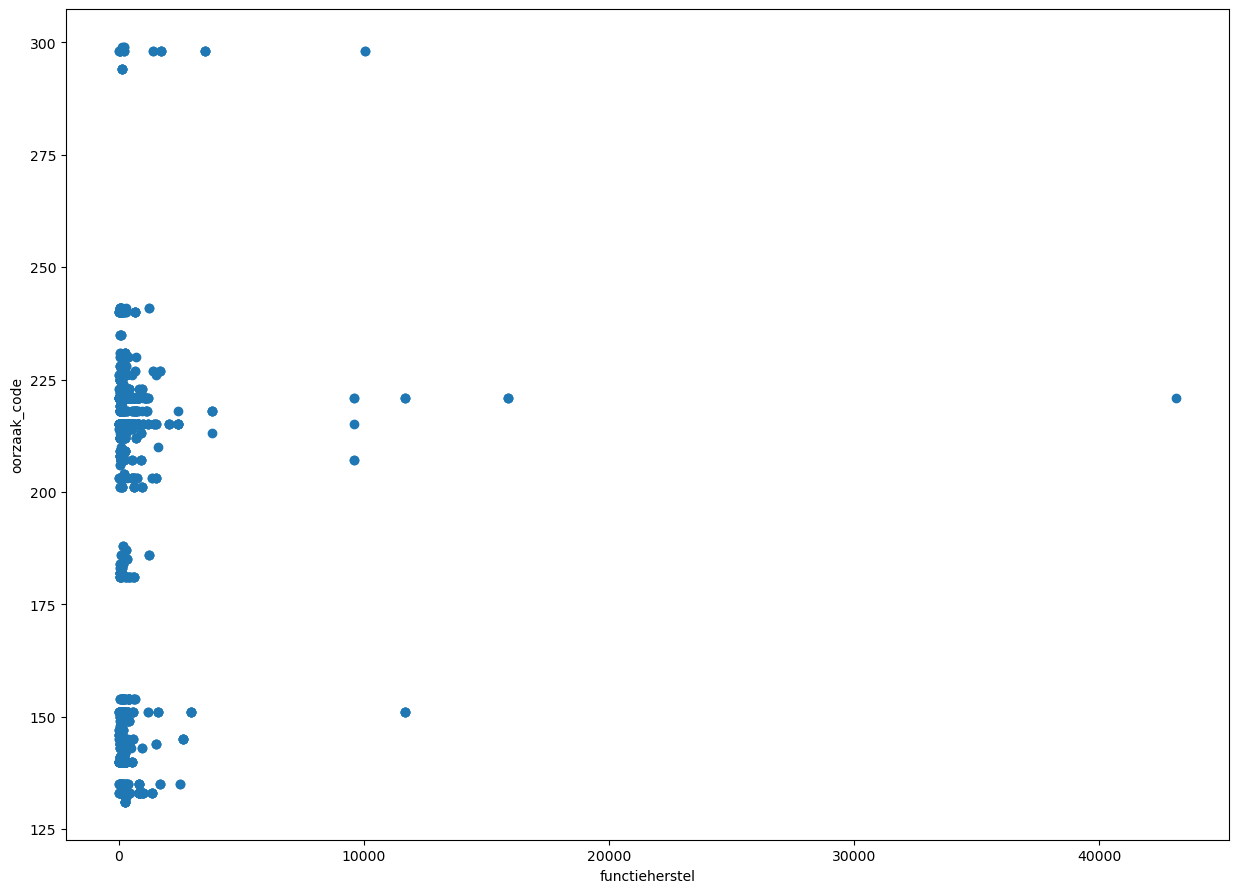

In [11]:
plt.figure(figsize=(15,11), dpi=100)
plt.scatter(functieherstel, oorzaakcode_feature, label="Scatter Plot")
plt.xlabel("functieherstel")
plt.ylabel("oorzaak_code")

We kunnen zien dat de oorzaak groep (TECHONV) de grootse frequentie heeft kwa oorzaak groep binnen het dataframe. We kunnen hier op verder kijken of dit oorzaak groep ook het grootse functieherstel tijd heeft dan andere oorzaakgroepen.

In [12]:
oorzaak_groep = pd.DataFrame(df, columns=["stm_oorz_code", "stm_oorz_groep", "stm_fh_duur"])

<AxesSubplot:>

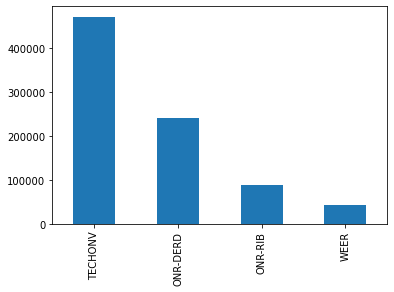

In [13]:
oorzaak_groep['stm_oorz_groep'].value_counts().plot(kind='bar')

In [14]:
TECHONV = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'TECHONV']
ONR_DERD = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'ONR-DERD']
ONR_RIB = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'ONR-RIB']
WEER = oorzaak_groep[oorzaak_groep.stm_oorz_groep == 'WEER']

We kunnen hier onder in de plot zien dat de oorzaak groep (TECHONV) veel meer data punten heeft bij een hogere functie herstel wat wilt zeggen dat algemeen binnen dat groep een oorzaak code een langere functie herstel heeft dan andere oorzaak codes binnen groepen

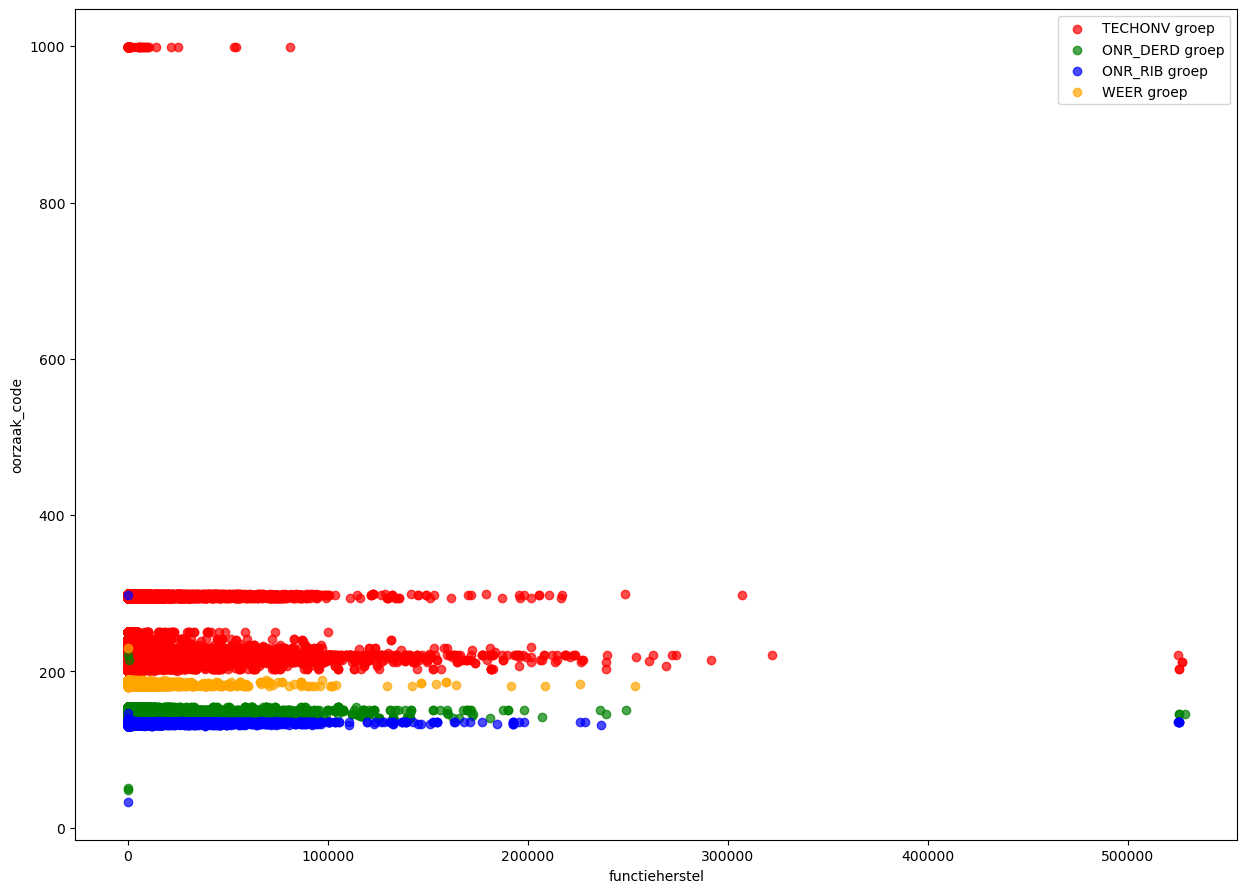

In [15]:
plt.figure(figsize=(15,11), dpi=100)
plt.scatter(TECHONV["stm_fh_duur"], TECHONV["stm_oorz_code"], label="TECHONV groep", color="r", alpha=.7)
plt.scatter(ONR_DERD["stm_fh_duur"], ONR_DERD["stm_oorz_code"], label="ONR_DERD groep", color="g", alpha=.7)
plt.scatter(ONR_RIB["stm_fh_duur"], ONR_RIB["stm_oorz_code"], label="ONR_RIB groep", color="b", alpha=.7)
plt.scatter(WEER["stm_fh_duur"], WEER["stm_oorz_code"], label="WEER groep", color="orange", alpha=.7)
plt.xlabel("functieherstel")
plt.ylabel("oorzaak_code")
plt.legend()

### Conclusie - oorzaakcode

We kunnen concluderen dat de feature variable oorzaakcode een matige feature variable is aangezien het wel nog wat over de functiehersteltijd wat zegt maar toch niet zwaar telt in het voorspellen van het tijd. dit kunnen we concluderen als we naar de plot hier boven kijken. we kunnen zien dat meerdere groepen het zelfde effect kunnen hebben op het functiehersteltijd inplaats van dat er verschillen zitten tussen groepen. hierbij word er aangetoond dat een specifiek groep geen zwaarder gewicht heeft dan een ander groep wat tot conclusie zegt dat er geen specifiek storing code is die algemener een zwaarder gewicht heeft dan een ander code.

In [16]:
class TimeUnit(enum.Enum):
    """Enum that represents a unit of measurement of time, to enable easy conversion from one unit to another.

    Values for units of measurements are measured in seconds."""
    second = 1
    minute = 60
    hour = 60 * 60
    day_night_cycle = 60 * 60 * 24


def convert_timeunit(value: pd.Series or float or int,
                     from_type: TimeUnit,
                     to_type: TimeUnit) -> float:
    """Convert an amount of time as number, or a series of those, to another.

    Not class attribute of TimeUnit class to allow for better typing.

    Args:
        value:
            a number, or a series of numbers, that represent an amount of time in a certain unit of measurement as defined in
            TimeUnit.
        from_type: TimeUnit scale of measurement of time that input is in.
        to_type: TimeUnit scale of measurement of time that output should be in.

    Returns:
        Time measurement(s) converted to new unit of measurement.
        Scalar if input was scalar, array/series of input type if input was array/series."""
    coef = from_type.value / to_type.value
    return value * coef

# Target creation

In [17]:
df["stm_aanntpl_ddt_as_pddt"] = pd.to_datetime(df["stm_aanntpl_ddt"], errors="coerce")
df["stm_fh_ddt_as_pddt"] = pd.to_datetime(df["stm_fh_ddt"], errors="coerce")

In [18]:
df["fh_min_aanntpl"] = df["stm_fh_ddt_as_pddt"] - df["stm_aanntpl_ddt_as_pddt"]

In [19]:
target = df["fh_min_aanntpl"].dt.total_seconds()

In [20]:
target.head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: fh_min_aanntpl, dtype: float64

# Badkuip model DataFrame

In [21]:
badkuip_model = pd.DataFrame(df, columns=["stm_sap_meld_ddt", "stm_aanntpl_dd", "stm_aanntpl_tijd", "stm_progfh_in_datum", "stm_progfh_in_tijd", "stm_progfh_in_invoer_tijd", "stm_progfh_in_duur", "stm_fh_duur", "stm_fh_ddt"])

In [22]:
fh_tijdsduur = pd.to_datetime((badkuip_model["stm_progfh_in_datum"] + " " + badkuip_model["stm_progfh_in_tijd"]), errors="coerce")
aannemer_terplaatse = pd.to_datetime((badkuip_model["stm_aanntpl_dd"] + " " + badkuip_model["stm_aanntpl_tijd"]), errors="coerce")

In [23]:
fh_tijdsduur

0                        NaT
1                        NaT
2                        NaT
3                        NaT
4                        NaT
                 ...        
898521   2013-11-05 09:35:00
898522   2013-11-05 11:00:00
898523   2013-11-05 11:00:00
898524   2016-08-20 16:00:00
898525   2016-08-20 16:00:00
Length: 898526, dtype: datetime64[ns]

In [24]:
fh_duur = fh_tijdsduur - aannemer_terplaatse

In [25]:
fh_duur.isna().sum()

327100

In [26]:
badkuip_model["real_fh_duur_prognose"] = fh_duur.dt.total_seconds()

In [27]:
badkuip_model["target_variable"] = target

In [28]:
badkuip_model

,stm_sap_meld_ddt,stm_aanntpl_dd,stm_aanntpl_tijd,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_fh_duur,stm_fh_ddt,real_fh_duur_prognose,target_variable
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/2006 09:00:00,NaN,00:00:00,NaN,00:00:00,00:00:00,99999999.0,0.0,02/01/2006 09:00:00,NaN,NaN
2,02/01/2006 12:35:00,NaN,00:00:00,NaN,00:00:00,00:00:00,99999999.0,51.0,02/01/2006 13:26:00,NaN,NaN
3,02/01/2006 16:40:00,NaN,00:00:00,NaN,00:00:00,00:00:00,99999999.0,40.0,02/01/2006 17:20:00,NaN,NaN
4,02/01/2006 22:30:00,NaN,00:00:00,NaN,00:00:00,00:00:00,99999999.0,6.0,02/01/2006 22:36:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
898521,11/05/2013 08:06:00,11/05/2013,09:05:00,11/05/2013,09:35:00,09:26:18,30,83.0,11/05/2013 09:29:00,1800.0,1440.0
898522,11/05/2013 09:21:00,11/05/2013,10:08:00,11/05/2013,11:00:00,10:16:27,52,83.0,11/05/2013 10:44:00,3120.0,2160.0
898523,11/05/2013 09:21:00,11/05/2013,10:08:00,11/05/2013,11:00:00,10:16:27,52,83.0,11/05/2013 10:44:00,3120.0,2160.0
898524,20/08/2016 14:15:17,20/08/2016,14:45:00,20/08/2016,16:00:00,15:16:29,75,19.0,20/08/2016 15:14:00,4500.0,1740.0


In [29]:
badkuip_model["real_fh_duur_prognose"].shape

(898526,)

In [30]:
boven_5_min = badkuip_model["real_fh_duur_prognose"] > convert_timeunit(5, TimeUnit.minute, TimeUnit.second)
onder_6_uur = badkuip_model["real_fh_duur_prognose"] < convert_timeunit(6, TimeUnit.hour, TimeUnit.second)

badkuip_model["real_fh_duur_prognose"] = badkuip_model["real_fh_duur_prognose"].loc[boven_5_min & onder_6_uur]  # Gemeten in seconden.

badkuip_model["real_fh_duur_prognose"].shape

(898526,)

# Aanenemer prognose

In [31]:
badkuip_model_fh_prognose_numeric = pd.to_numeric(badkuip_model["stm_progfh_in_duur"], errors='coerce')

<AxesSubplot:>

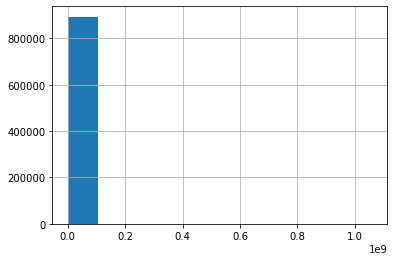

In [32]:
badkuip_model_fh_prognose_numeric.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7a7f06250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc8b7e5a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7a7f067c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7a7f05a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7a7f051f0>],
 'means': []}

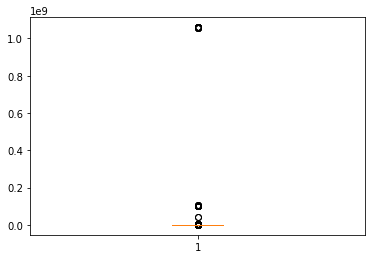

In [33]:
plt.boxplot(badkuip_model_fh_prognose_numeric.dropna())

In [34]:
badkuip_model_fh_prognose_numeric.head(20)

0            NaN
1     99999999.0
2     99999999.0
3     99999999.0
4     99999999.0
5     99999999.0
6     99999999.0
7     99999999.0
8     99999999.0
9     99999999.0
10    99999999.0
11    99999999.0
12    99999999.0
13    99999999.0
14    99999999.0
15    99999999.0
16    99999999.0
17    99999999.0
18    99999999.0
19    99999999.0
Name: stm_progfh_in_duur, dtype: float64

In [35]:
(badkuip_model_fh_prognose_numeric == 99999999.0).shape

(898526,)

In [36]:
boven_5_min = badkuip_model_fh_prognose_numeric > 5
onder_6_uur = badkuip_model_fh_prognose_numeric < convert_timeunit(6, TimeUnit.hour, TimeUnit.minute)

badkuip_model_fh_prognose_numeric = badkuip_model_fh_prognose_numeric.loc[boven_5_min & onder_6_uur]  # Gemeten in seconden.

badkuip_model_fh_prognose_numeric.shape

(444500,)

In [ ]:
result = pd.merge(badkuip_model_fh_prognose_numeric, badkuip_model)

In [ ]:
result